In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
df=pd.read_csv('../Data/train.csv')

In [49]:
df[df["is_consumption"] == 1]
df["datetime"] = pd.to_datetime(df["datetime"])


In [50]:
df_validation = df[(df['datetime']>=pd.to_datetime('2023-05-17 00:00:00'))]

df_train_test = df[(df['datetime']<pd.to_datetime('2023-05-17 00:00:00'))& 
                   (df['datetime']>=pd.to_datetime('2022-01-01 00:00:00'))]

df_train = df_train_test.head(int(0.85*len(df_train_test)))
df_test = df_train_test.tail(int(0.15*len(df_train_test)))



In [51]:
df_train_c =  df_train[df_train["is_consumption"] == 1].groupby("datetime").mean()
df_train_p =  df_train[df["is_consumption"] == 0].groupby("datetime").mean()

df_test_c =  df_test[df_test["is_consumption"] == 1].groupby("datetime").mean()
df_test_p =  df_test[df["is_consumption"] == 0].groupby("datetime").mean()

df_validation_c =  df_validation[df_validation["is_consumption"] == 1].groupby("datetime").mean()
df_validation_p =  df_validation[df["is_consumption"] == 0].groupby("datetime").mean()

C:\Users\asus\AppData\Local\Temp\ipykernel_35452\1355044471.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train_p =  df_train[df["is_consumption"] == 0].groupby("datetime").mean()
C:\Users\asus\AppData\Local\Temp\ipykernel_35452\1355044471.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_p =  df_test[df["is_consumption"] == 0].groupby("datetime").mean()
C:\Users\asus\AppData\Local\Temp\ipykernel_35452\1355044471.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_validation_p =  df_validation[df["is_consumption"] == 0].groupby("datetime").mean()


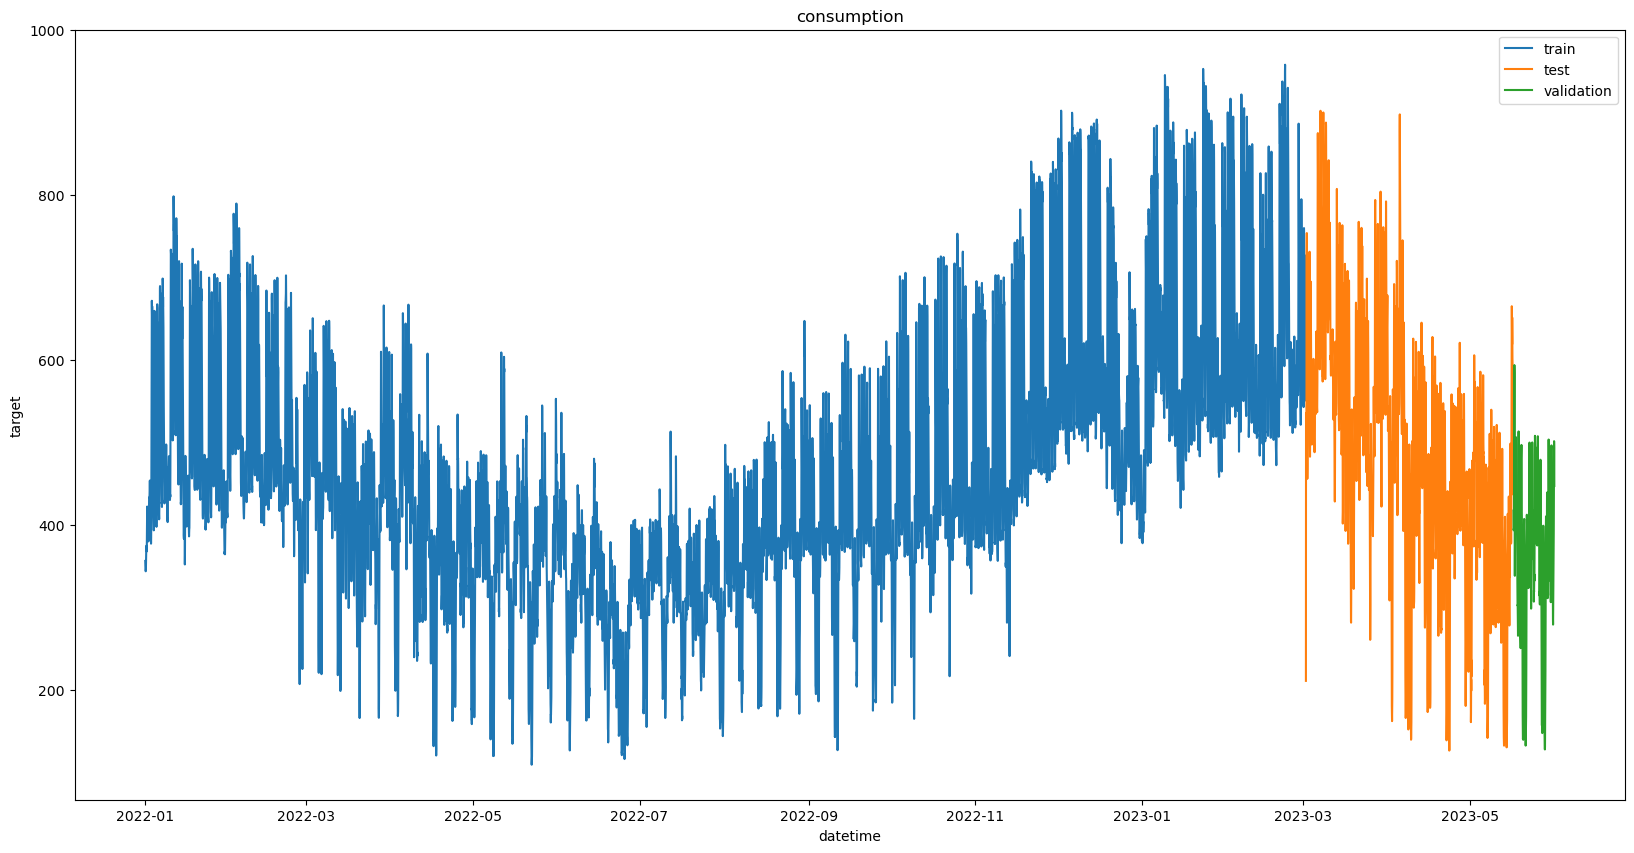

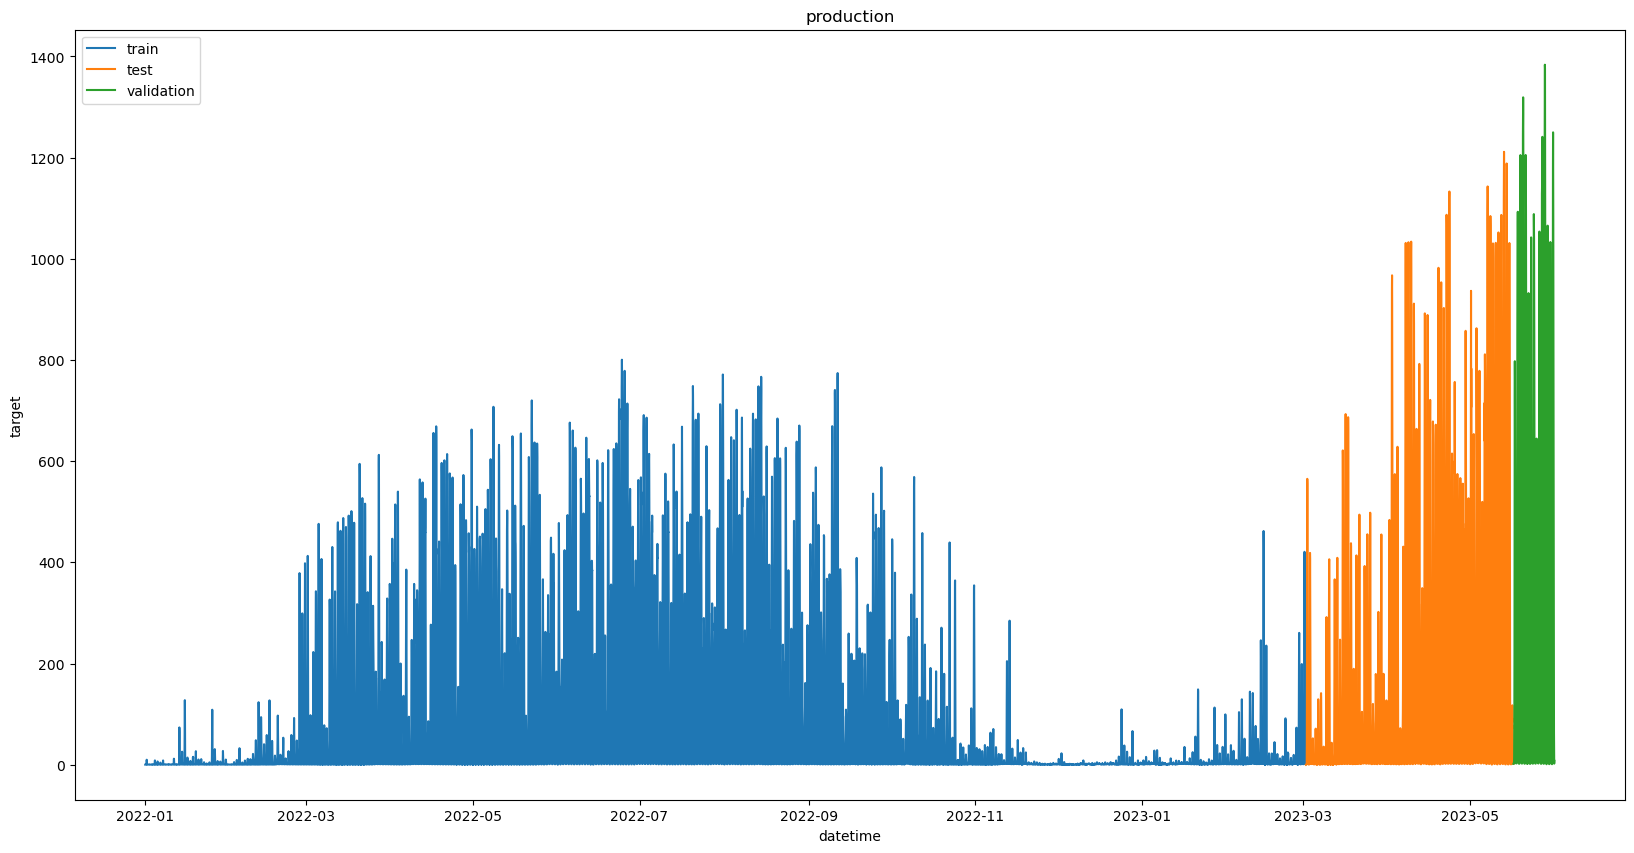

In [52]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_train_c,x=df_train_c.index,y="target",label="train")
plt.title("consumption")
sns.lineplot(data=df_test_c,x=df_test_c.index,y="target",label="test")
sns.lineplot(data=df_validation_c,x=df_validation_c.index,y="target",label="validation")
plt.show()

plt.figure(figsize=(20, 10))
plt.title("production")
sns.lineplot(data=df_train_p,x=df_train_c.index,y="target",label="train")
sns.lineplot(data=df_test_p,x=df_test_p.index,y="target",label="test")
sns.lineplot(data=df_validation_p,x=df_validation_p.index,y="target",label="validation")
plt.show()